## Health Insurance Company Provides Car Insureanse for already clients
There are an Health Insurance company that wants to offer an aditional service to their clients, which is a Car Insurance service. And, trying to offer only for the most posible clients to aquire the service they want a platform that can predict which clients has these kind of profile.

In [136]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, roc_curve

In [137]:
# Reading the da base
df = pd.read_csv('/Users/Caio/Documents/MeusProjetos/HICSP/dataset/train.csv', sep=',')

In [138]:
# Seeing the data
df.head(5)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [139]:
# Obtaining some informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   gender                381109 non-null  object
 2   age                   381109 non-null  int64 
 3   driving_license       381109 non-null  int64 
 4   region_code           381109 non-null  int64 
 5   previously_insured    381109 non-null  int64 
 6   vehicle_age           381109 non-null  object
 7   vehicle_damage        381109 non-null  object
 8   annual_premium        381109 non-null  int64 
 9   policy_sales_channel  381109 non-null  int64 
 10  vintage               381109 non-null  int64 
 11  response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [140]:
# initial information of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
driving_license,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
region_code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
previously_insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
annual_premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
policy_sales_channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [141]:
# Searching for null values
df.isnull().sum()

id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [142]:
# checking duplicated data
df.duplicated().sum()

0

In [143]:
# dropping the 'id' column, his informations are not important for the development of models
df = df.drop(columns = 'id')

In [144]:
# about column Vehicle_Age, checking it content for preprocessing
df.vehicle_age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [145]:
# Applying an OneHotEncoder into some columns that presents string content
df['vehicle_age'] = df['vehicle_age'].map({'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}).astype(int)
df['gender'] = df['gender'].map({'Male':0, 'Female':1}).astype(int)
df['vehicle_damage'] = df['vehicle_damage'].map({'No':0, 'Yes':1}).astype(int)

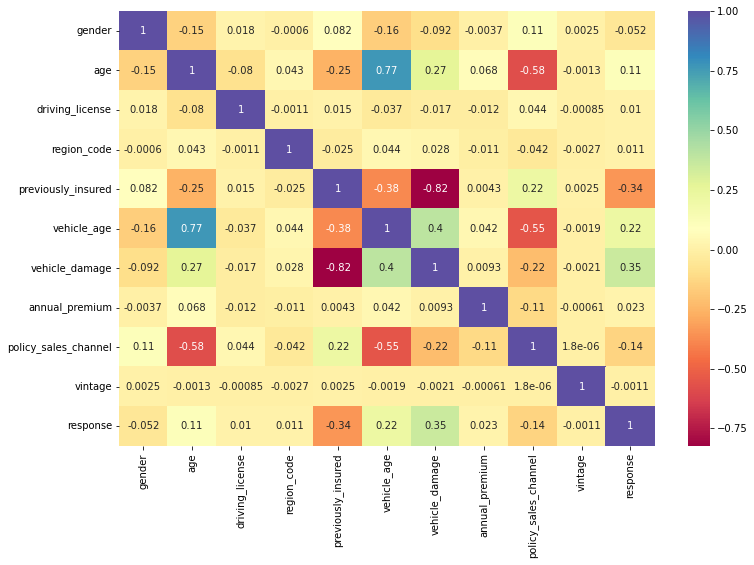

In [146]:
# correlation visualization of the data
plt.figure(figsize=((12,8)))
sns.heatmap(df.corr(), cmap='Spectral', annot=True)

In [147]:
x = df.drop(columns='response')
y = df['response']

In [148]:
df['response'].value_counts()

0    334399
1     46710
Name: response, dtype: int64

In [149]:
# Applying SMOTE to rebalance the classes
sm = SMOTE(sampling_strategy = 0.3)

In [150]:
x, y = sm.fit_resample(x, y)

In [151]:
def make_mi_score(x, y):
    """Applycation of Mutual Information on a dataset
    
    Args:
        x: Data that Mutual Information will be applyed.
        y: Data used as 'reference' for the Mutual Information.
    
    """
    mi_score = mutual_info_classif(x, y, discrete_features='auto')
    mi_score = pd.Series(mi_score, index=x.columns)
    mi_score = mi_score.sort_values(ascending=False)
    return mi_score

In [152]:
# Applying the Mutual Information of the data set.
mi_scores = make_mi_score(x, y)
mi_scores

previously_insured      0.155633
vehicle_damage          0.143765
policy_sales_channel    0.107766
driving_license         0.070277
age                     0.059851
vehicle_age             0.048814
gender                  0.030209
region_code             0.026156
annual_premium          0.015085
vintage                 0.000725
dtype: float64

In [158]:
# Obtaining the data with a Mutual Information greater them 0.01
x1 = x.loc[:, mi_scores > 0.02]
x1.shape

(434718, 8)

In [159]:
x1_col = x1.columns

### Development of a model for client prediction

In [155]:
def roc_calc_curve(pred, y, name):

    '''
    Compute ROC curve and ROC area for each class and generates the figure with the curve.

    Args:
        pred: prediction data from cross validation prediction
        y: array used to validate the model
        name: model name (str)
    
    '''
    fpr, tpr, _ = roc_curve(y, pred)
    #roc_auc = auc(fpr, tpr)

    '''# Compute micro-average ROC curve and ROC area - Achar um jeito de isso funcionar***
    fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), pred_lr.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])'''

    plt.plot(fpr, tpr, color='red', label=name)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


### Naive-Bayes - Categorical algorithm

In [160]:
cat_nb1 = CategoricalNB()
cat_nb1.fit(x1, y)

cat_nb1_pred = cross_val_predict(estimator=cat_nb1, X = x1, y = y, cv=5)

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82    334399
           1       0.48      0.85      0.61    100319

    accuracy                           0.75    434718
   macro avg       0.71      0.79      0.72    434718
weighted avg       0.84      0.75      0.77    434718



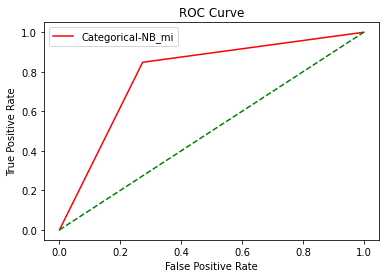

In [161]:
print('Classification report: \n', classification_report(y, cat_nb1_pred))
roc_calc_curve(cat_nb1_pred, y, 'Categorical-NB_mi')

### Pickle file creation for modeling deploy

Reading and processing the test dataset for the prediction applying the recent developed model.

In [173]:
# Reading 'id' column and the remaining columns in x1 dataset
test_id = pd.read_csv('/Users/Caio/Documents/MeusProjetos/HICSP/dataset/test.csv', sep=',', usecols=['id'])
test = pd.read_csv('/Users/Caio/Documents/MeusProjetos/HICSP/dataset/test.csv', sep=',', usecols=x1_col)

In [165]:
test.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,policy_sales_channel
0,1,25,1,11,1,1,0,152
1,1,40,1,28,0,0,1,7
2,1,47,1,28,0,0,1,124
3,1,24,1,27,1,1,1,152
4,1,27,1,28,1,1,0,152


In [164]:
# Applying the OneHotEncoder on test dataset
test.gender = test.gender.astype('category').cat.codes
test.vehicle_damage = test.vehicle_damage.astype('category').cat.codes
test.vehicle_age = test.vehicle_age.astype('category').cat.codes

In [166]:
# Creating pickle file
joblib.dump(cat_nb1, 'modelo2.pkl')

['modelo2.pkl']

In [167]:
# Loading the model in a variable
modelo2 = joblib.load('modelo2.pkl')

In [168]:
# Predicting the 'response' based on 'test' dataset
response_pred = modelo2.predict(test)

In [175]:
# Storing predicted information into a DataFrame and writing csv file
pred_modelo2 = pd.DataFrame({'id': test_id['id'], 'response': response_pred})
pred_modelo2.to_csv('predicao2.csv', index = False)